# Goals Analyse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def RegressaoLinear(X,Y,Interval):
    # Reshaping vectors to columns, each row represent a sample
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    # Creating the Regression Model
    regr = linear_model.LinearRegression()

    # Training de Model:
    regr.fit(X, Y)

    
    # Applying the Model into the Data:
    Y_Pred = regr.predict(Time.reshape(-1,1))
    Y_Pred = Y_Pred.reshape(1, -1)
    return Y_Pred[0]

<IPython.core.display.Javascript object>

Besides Brazilian Champioship and Europe games, all the data sets are from
www.fbref.com

In [3]:
df_Games_Brasil = pd.read_csv("SerieA.csv",sep = ';', index_col="Unnamed: 0")
df_Copa_Brasil = pd.read_csv("Kaggle/CopaBrasil.csv", sep=";", index_col="Unnamed: 0")
df_Libertadores = pd.read_csv(
    "Kaggle/Libertadores.csv", sep=";", index_col="Unnamed: 0"
)
df_SerieA_Italia = pd.read_csv("FBREF/Clean/SerieA-Italia.csv", sep=";")
df_Ligue1 = pd.read_csv("FBREF/Clean/Ligue1.csv", sep=";")
df_PremierLeague = pd.read_csv("FBREF/Clean/PremierLegue.csv", sep=";")
df_LaLiga = pd.read_csv("FBREF/Clean/LaLiga.csv", sep=";", parse_dates=[0])

<IPython.core.display.Javascript object>

In [4]:
Europe_games = pd.read_csv("Kaggle/archive/games.csv")
Europe_games["date"] = Europe_games.apply(
    lambda x: (datetime.datetime.strptime(x["date"], "%Y-%m-%d")), axis=1
)

<IPython.core.display.Javascript object>

### Brazil Serie A

In [5]:
df_Games_Brasil.head()

,season,data,horario,rodada,estadio,arbitro,publico,publico_max,time_man,time_vis,...,chutes_bola_parada_man,chutes_bola_parada_vis,defesas_man,defesas_vis,impedimentos_man,impedimentos_vis,chutes_man,chutes_vis,chutes_fora_man,chutes_fora_vis
0,2003,2003-03-29,08:00,1,Estádio Brinco de Ouro da Princesa,NaN,NaN,NaN,Guarani,Vasco da Gama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-03-29,08:00,1,Arena da Baixada,NaN,NaN,NaN,Atlético-PR,Grêmio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,2003-03-30,09:00,1,Estádio Jornalista Mário Filho,NaN,NaN,NaN,Flamengo,Coritiba FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,2003-03-30,09:00,1,Estádio de Hailé Pinheiro,NaN,NaN,NaN,Goiás EC,Paysandu SC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,2003-03-30,09:00,1,Estádio Beira-Rio,NaN,NaN,NaN,Internacional,Ponte Preta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [6]:
goals_brazillian_seriA = df_Games_Brasil[['season','home_goal','away_goal']].dropna()
goals_brazillian_seriA.head()


,season,home_goal,away_goal
0,2003,4.0,2.0
1,2003,2.0,0.0
2,2003,1.0,1.0
3,2003,2.0,2.0
4,2003,1.0,1.0


<IPython.core.display.Javascript object>

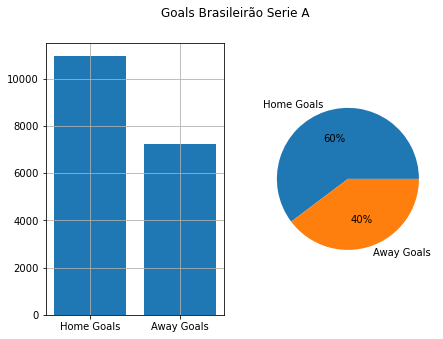

<IPython.core.display.Javascript object>

In [7]:
label = ["Home Goals", "Away Goals"]
fig, ax  = plt.subplots(1,2,figsize=(7, 5))

fig.suptitle("Goals Brasileirão Serie A")

ax[0].grid()
ax[0].bar(label,goals_brazillian_seriA[['home_goal','away_goal']].sum().values)

ax[1].pie(goals_brazillian_seriA[['home_goal','away_goal']].sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [8]:

label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
grouping = goals_brazillian_seriA.groupby(by= 'season').mean()
Home_grouping = grouping['home_goal'].values
Away_grouping = grouping['away_goal'].values

# Selecting Variables to the Regression
##Home:
X_Home = goals_brazillian_seriA['season'].values
Y_Home = goals_brazillian_seriA['home_goal'].values

Time = np.arange(min(X_Home),max(X_Home)+1)

##Away:
X_Away = goals_brazillian_seriA['season'].values
Y_Away = goals_brazillian_seriA['away_goal'].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home,Time)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away,Time)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0038
Away Mean Squared Error: 0.0093
Home R²: 0.81
Away R²: 0.38


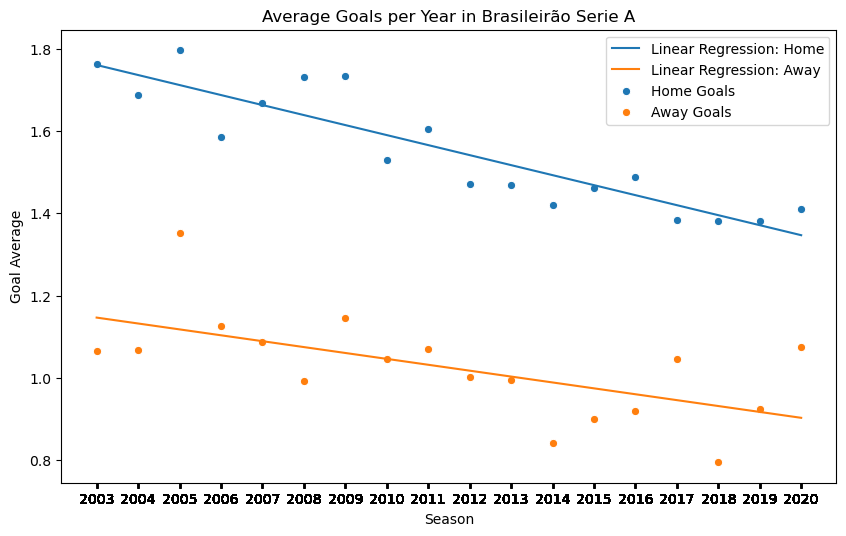

<IPython.core.display.Javascript object>

In [9]:
fig = plt.figure(figsize=(10, 6), dpi = 100)

plt.title("Average Goals per Year in Brasileirão Serie A")
plt.xlabel("Season")
plt.ylabel("Goal Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Home_grouping, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Away_grouping, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Home_grouping, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Away_grouping, Y_Away_Pred))


plt.plot(Time, Y_Home_Pred)
plt.plot(Time, Y_Away_Pred)

sns.scatterplot(
    
    x= Time,
    y=Home_grouping,
)
sns.scatterplot(
    x=Time,
    y=Away_grouping
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Libertadores da América

In [7]:
goals_libertadores = (
    df_Libertadores[["season", "home_goal", "away_goal"]]
)
goals_libertadores.head()

,season,home_goal,away_goal
0,2013,2,2
1,2013,1,2
2,2013,2,3
3,2013,1,2
4,2013,1,1


<IPython.core.display.Javascript object>

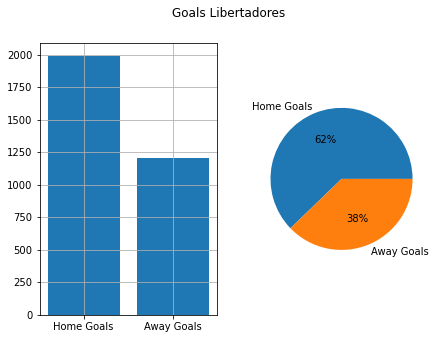

<IPython.core.display.Javascript object>

In [11]:
label = ["Home Goals", "Away Goals"]
fig, ax  = plt.subplots(1,2,figsize=(7, 5))

fig.suptitle("Goals Libertadores")

ax[0].grid()
ax[0].bar(label,goals_libertadores[['home_goal','away_goal']].sum().values)

ax[1].pie(goals_libertadores[['home_goal','away_goal']].sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [12]:

label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

grouping = goals_libertadores.groupby(by= 'season').mean()
Home_grouping = grouping['home_goal'].values
Away_grouping = grouping['away_goal'].values

# Selecting Variables to the Regression
##Home:
X_Home = goals_libertadores['season'].values
Y_Home = goals_libertadores['home_goal'].values

Time = np.arange(min(X_Home),max(X_Home)+1)

##Away:
X_Away = goals_libertadores['season'].values
Y_Away = goals_libertadores['away_goal'].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home,Time)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away,Time)


<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0120
Away Mean Squared Error: 0.0071
Home R²: 0.06
Away R²: 0.02


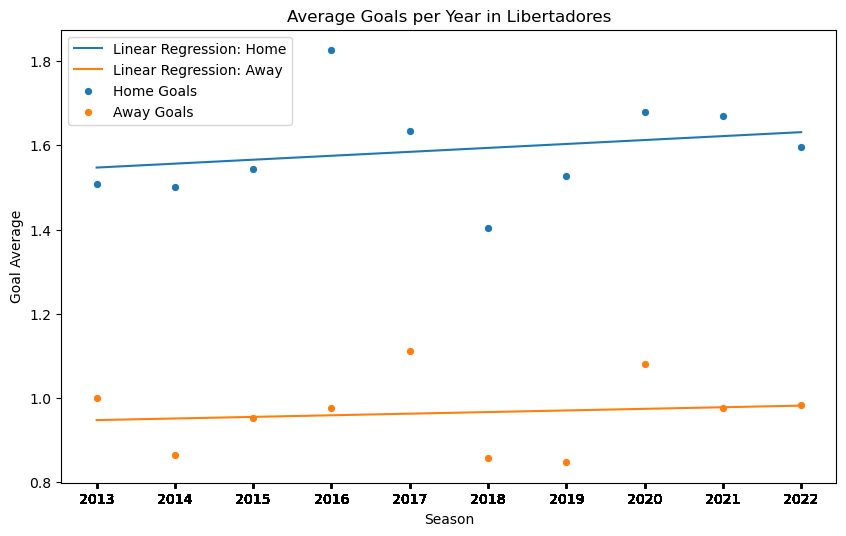

<IPython.core.display.Javascript object>

In [13]:
fig = plt.figure(figsize=(10, 6), dpi = 100)

plt.title("Average Goals per Year in Libertadores")
plt.xlabel("Season")
plt.ylabel("Goal Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Home_grouping, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Away_grouping, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Home_grouping, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Away_grouping, Y_Away_Pred))


plt.plot(Time, Y_Home_Pred)
plt.plot(Time, Y_Away_Pred)

sns.scatterplot(
    
    x= Time,
    y=Home_grouping,
)
sns.scatterplot(
    x=Time,
    y=Away_grouping
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Brazilian Cup

In [8]:
goals_brazilian_cup = df_Copa_Brasil[["season", "home_goal", "away_goal"]]

<IPython.core.display.Javascript object>

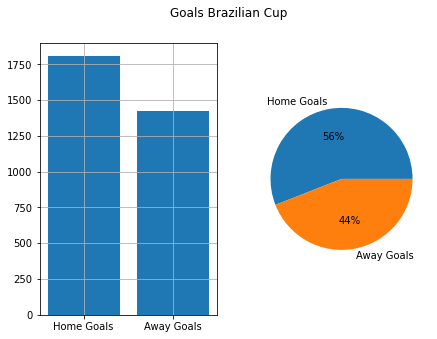

<IPython.core.display.Javascript object>

In [15]:
label = ["Home Goals", "Away Goals"]
fig, ax  = plt.subplots(1,2,figsize=(7, 5))

fig.suptitle("Goals Brazilian Cup")

ax[0].grid()
ax[0].bar(label,goals_brazilian_cup[['home_goal','away_goal']].sum().values)

ax[1].pie(goals_brazilian_cup[['home_goal','away_goal']].sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [16]:
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
grouping = goals_brazilian_cup.groupby(by= 'season').mean()
Home_grouping = grouping['home_goal'].values
Away_grouping = grouping['away_goal'].values

# Selecting Variables to the Regression
##Home:
X_Home = goals_brazilian_cup['season'].values
Y_Home = goals_brazilian_cup['home_goal'].values

Time = np.arange(min(X_Home),max(X_Home)+1)

##Away:
X_Away = goals_brazilian_cup['season'].values
Y_Away = goals_brazilian_cup['away_goal'].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home,Time)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away,Time)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0092
Away Mean Squared Error: 0.0104
Home R²: 0.72
Away R²: -0.00


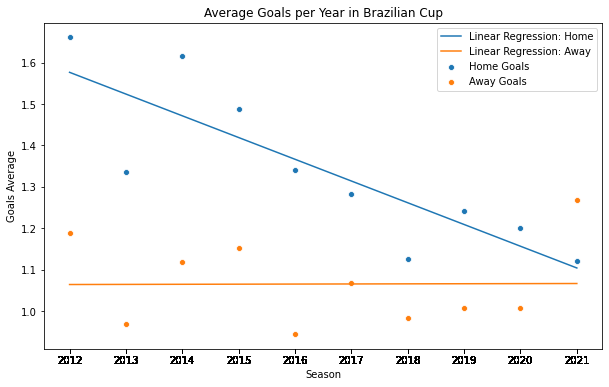

<IPython.core.display.Javascript object>

In [17]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Brazilian Cup")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Home_grouping, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Away_grouping, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Home_grouping, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Away_grouping, Y_Away_Pred))


plt.plot(Time, Y_Home_Pred)
plt.plot(Time, Y_Away_Pred)

sns.scatterplot(
    
    x= Time,
    y=Home_grouping,
)
sns.scatterplot(
    x=Time,
    y=Away_grouping
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Europe Games

In [9]:
goals_europe = (
    Europe_games[["season", "home_club_goals", "away_club_goals"]]
    
)
goals_europe.head()

,season,home_club_goals,away_club_goals
0,2011,3,2
1,2012,3,2
2,2012,4,2
3,2012,1,0
4,2012,2,1


<IPython.core.display.Javascript object>

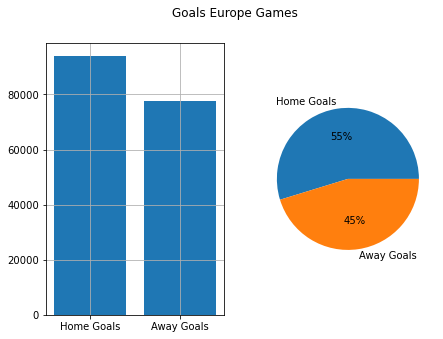

<IPython.core.display.Javascript object>

In [19]:
label = ["Home Goals", "Away Goals"]
fig, ax  = plt.subplots(1,2,figsize=(7, 5))

fig.suptitle("Goals Europe Games")

ax[0].grid()
ax[0].bar(label,goals_europe[['home_club_goals','away_club_goals']].sum().values)

ax[1].pie(goals_europe[['home_club_goals','away_club_goals']].sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [20]:
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
grouping = goals_europe.groupby(by= 'season').mean()
Home_grouping = grouping['home_club_goals'].values
Away_grouping = grouping['away_club_goals'].values

# Selecting Variables to the Regression
##Home:
X_Home = goals_europe['season'].values
Y_Home = goals_europe['home_club_goals'].values

Time = np.arange(min(X_Home),max(X_Home)+1)

##Away:
X_Away = goals_europe['season'].values
Y_Away = goals_europe['away_club_goals'].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home,Time)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away,Time)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0037
Away Mean Squared Error: 0.0019
Home R²: -0.23
Away R²: 0.68


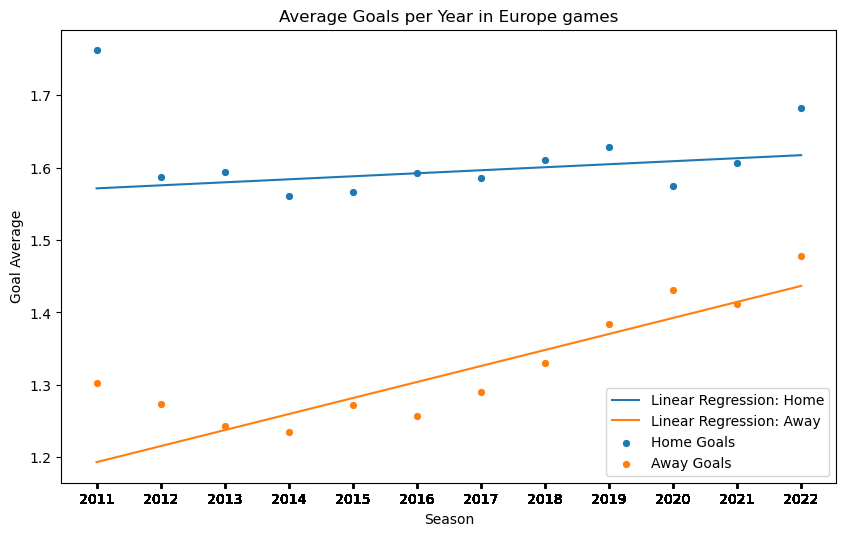

<IPython.core.display.Javascript object>

In [21]:
fig = plt.figure(figsize=(10, 6), dpi = 100)

plt.title("Average Goals per Year in Europe games")
plt.xlabel("Season")
plt.ylabel("Goal Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Home_grouping, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Away_grouping, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Home_grouping, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Away_grouping, Y_Away_Pred))


plt.plot(Time, Y_Home_Pred)
plt.plot(Time, Y_Away_Pred)

sns.scatterplot(
    
    x= Time,
    y=Home_grouping,
)
sns.scatterplot(
    x=Time,
    y=Away_grouping
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Italian Serie A

In [10]:
goals_italy = (
    df_SerieA_Italia[["Season", "home_goal", "away_goal"]])

<IPython.core.display.Javascript object>

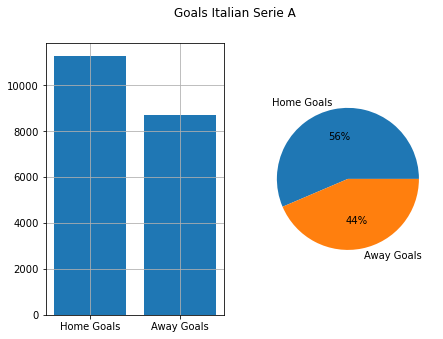

<IPython.core.display.Javascript object>

In [23]:
label = ["Home Goals", "Away Goals"]
fig, ax  = plt.subplots(1,2,figsize=(7, 5))

fig.suptitle("Goals Italian Serie A")

ax[0].grid()
ax[0].bar(label,goals_italy[['home_goal','away_goal']].sum().values)

ax[1].pie(goals_italy[['home_goal','away_goal']].sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [24]:
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
grouping = goals_italy.groupby(by= 'Season').mean()
Home_grouping = grouping['home_goal'].values
Away_grouping = grouping['away_goal'].values

# Selecting Variables to the Regression
##Home:
X_Home = goals_italy['Season'].values
Y_Home = goals_italy['home_goal'].values

Time = np.arange(min(X_Home),max(X_Home)+1)

##Away:
X_Away = goals_italy['Season'].values
Y_Away = goals_italy['away_goal'].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home,Time)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away,Time)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0029
Away Mean Squared Error: 0.0049
Home R²: 0.16
Away R²: 0.63


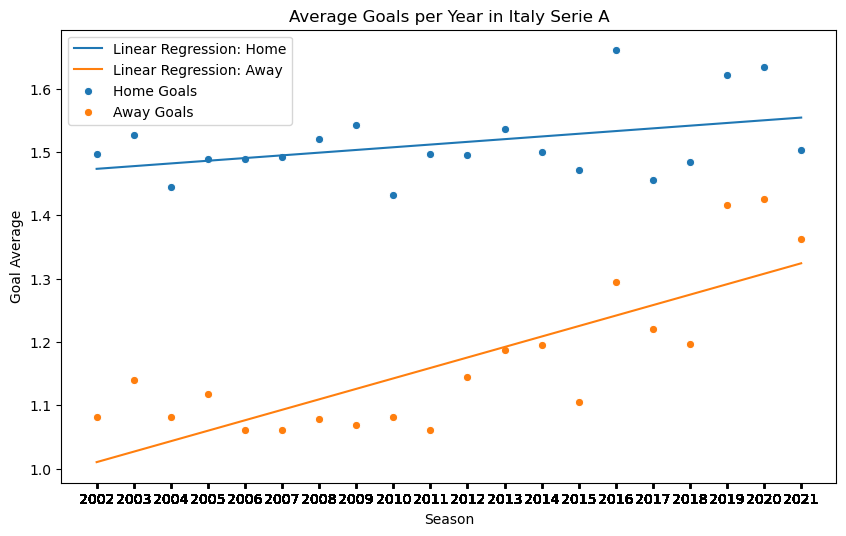

<IPython.core.display.Javascript object>

In [25]:
fig = plt.figure(figsize=(10, 6), dpi = 100)

plt.title("Average Goals per Year in Italy Serie A")
plt.xlabel("Season")
plt.ylabel("Goal Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Home_grouping, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Away_grouping, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Home_grouping, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Away_grouping, Y_Away_Pred))


plt.plot(Time, Y_Home_Pred)
plt.plot(Time, Y_Away_Pred)

sns.scatterplot(
    
    x= Time,
    y=Home_grouping,
)
sns.scatterplot(
    x=Time,
    y=Away_grouping
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### French Ligue 1 

In [11]:
goals_ligue1 = df_Ligue1[['Season','home_goal','away_goal']].dropna()
goals_ligue1.head()


,Season,home_goal,away_goal
0,2002,3,3
1,2002,1,1
2,2002,1,0
3,2002,1,2
4,2002,0,0


<IPython.core.display.Javascript object>

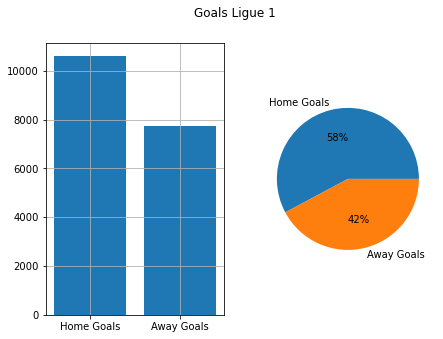

<IPython.core.display.Javascript object>

In [27]:
label = ["Home Goals", "Away Goals"]
fig, ax  = plt.subplots(1,2,figsize=(7, 5))

fig.suptitle("Goals Ligue 1")

ax[0].grid()
ax[0].bar(label,goals_ligue1[['home_goal','away_goal']].sum().values)

ax[1].pie(goals_ligue1[['home_goal','away_goal']].sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [28]:
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
grouping = goals_ligue1.groupby(by= 'Season').mean()
Home_grouping = grouping['home_goal'].values
Away_grouping = grouping['away_goal'].values

# Selecting Variables to the Regression
##Home:
X_Home = goals_ligue1['Season'].values
Y_Home = goals_ligue1['home_goal'].values

Time = np.arange(min(X_Home),max(X_Home)+1)

##Away:
X_Away = goals_ligue1['Season'].values
Y_Away = goals_ligue1['away_goal'].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home,Time)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away,Time)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0030
Away Mean Squared Error: 0.0037
Home R²: 0.57
Away R²: 0.77


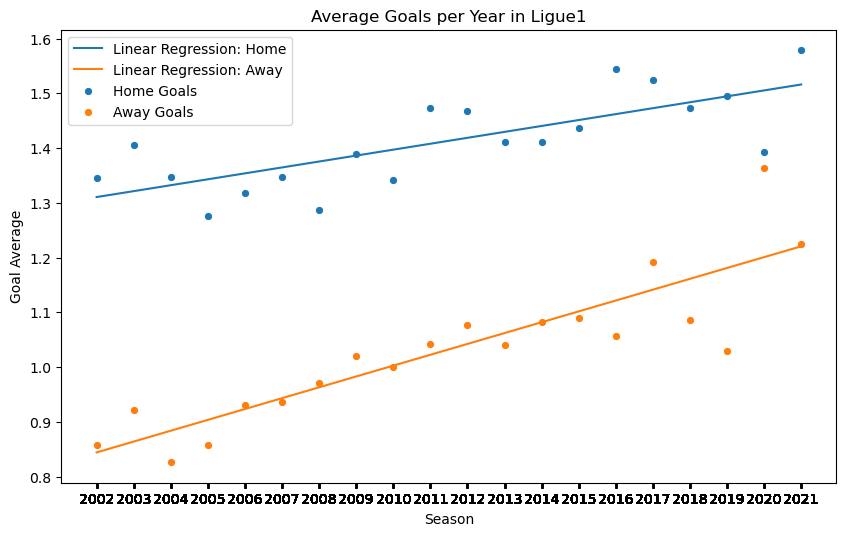

<IPython.core.display.Javascript object>

In [29]:
fig = plt.figure(figsize=(10, 6), dpi = 100)

plt.title("Average Goals per Year in Ligue1")
plt.xlabel("Season")
plt.ylabel("Goal Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Home_grouping, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Away_grouping, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Home_grouping, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Away_grouping, Y_Away_Pred))


plt.plot(Time, Y_Home_Pred)
plt.plot(Time, Y_Away_Pred)

sns.scatterplot(
    
    x= Time,
    y=Home_grouping,
)
sns.scatterplot(
    x=Time,
    y=Away_grouping
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### English Premier League

In [12]:
goals_premier_league = df_Games_Brasil[['season','home_goal','away_goal']].dropna()
goals_premier_league.head()


,season,home_goal,away_goal
0,2003,4.0,2.0
1,2003,2.0,0.0
2,2003,1.0,1.0
3,2003,2.0,2.0
4,2003,1.0,1.0


<IPython.core.display.Javascript object>

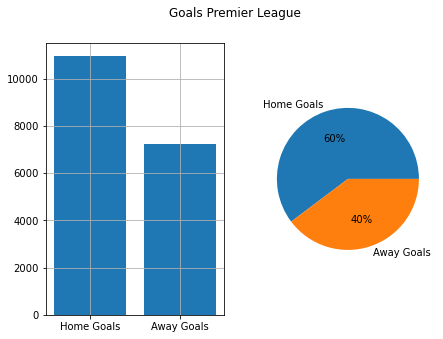

<IPython.core.display.Javascript object>

In [31]:
label = ["Home Goals", "Away Goals"]
fig, ax  = plt.subplots(1,2,figsize=(7, 5))

fig.suptitle("Goals Premier League")

ax[0].grid()
ax[0].bar(label,goals_premier_league[['home_goal','away_goal']].sum().values)

ax[1].pie(goals_premier_league[['home_goal','away_goal']].sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [32]:

label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
grouping = goals_premier_league.groupby(by= 'season').mean()
Home_grouping = grouping['home_goal'].values
Away_grouping = grouping['away_goal'].values

# Selecting Variables to the Regression
##Home:
X_Home = goals_premier_league['season'].values
Y_Home = goals_premier_league['home_goal'].values

Time = np.arange(min(X_Home),max(X_Home)+1)

##Away:
X_Away = goals_premier_league['season'].values
Y_Away = goals_premier_league['away_goal'].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home,Time)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away,Time)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0038
Away Mean Squared Error: 0.0093
Home R²: 0.81
Away R²: 0.38


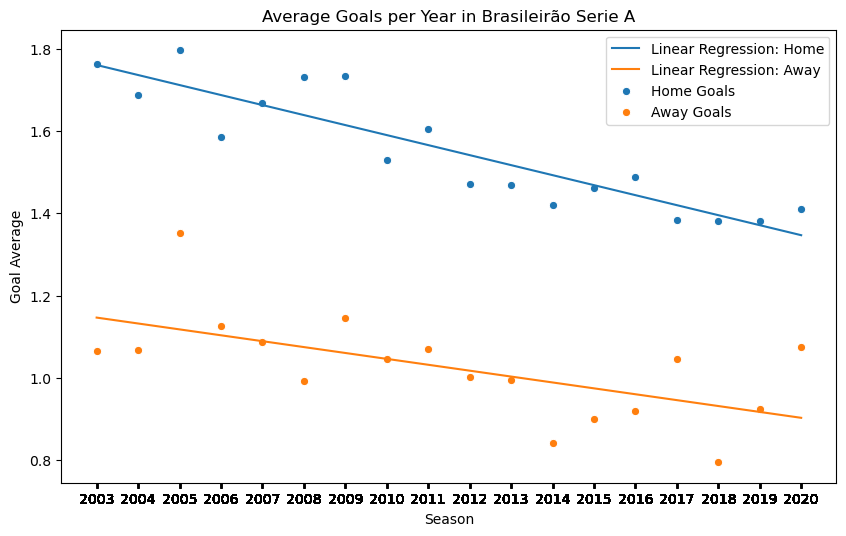

<IPython.core.display.Javascript object>

In [33]:
fig = plt.figure(figsize=(10, 6), dpi = 100)

plt.title("Average Goals per Year in Brasileirão Serie A")
plt.xlabel("Season")
plt.ylabel("Goal Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Home_grouping, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Away_grouping, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Home_grouping, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Away_grouping, Y_Away_Pred))


plt.plot(Time, Y_Home_Pred)
plt.plot(Time, Y_Away_Pred)

sns.scatterplot(
    
    x= Time,
    y=Home_grouping,
)
sns.scatterplot(
    x=Time,
    y=Away_grouping
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Spanish La Liga

In [13]:
goals_laliga = df_LaLiga[['Season','home_goal','away_goal']].dropna()
goals_laliga.head()


,Season,home_goal,away_goal
0,2002,0,1
1,2002,2,2
2,2002,2,2
3,2002,2,2
4,2002,0,1


<IPython.core.display.Javascript object>

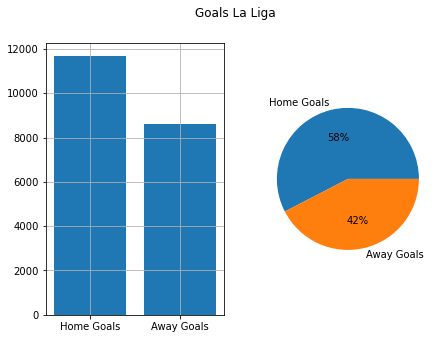

<IPython.core.display.Javascript object>

In [35]:
label = ["Home Goals", "Away Goals"]
fig, ax  = plt.subplots(1,2,figsize=(7, 5))

fig.suptitle("Goals La Liga")

ax[0].grid()
ax[0].bar(label,goals_laliga[['home_goal','away_goal']].sum().values)

ax[1].pie(goals_laliga[['home_goal','away_goal']].sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [36]:

label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]
grouping = goals_laliga.groupby(by= 'Season').mean()
Home_grouping = grouping['home_goal'].values
Away_grouping = grouping['away_goal'].values

# Selecting Variables to the Regression
##Home:
X_Home = goals_laliga['Season'].values
Y_Home = goals_laliga['home_goal'].values

Time = np.arange(min(X_Home),max(X_Home)+1)

##Away:
X_Away = goals_laliga['Season'].values
Y_Away = goals_laliga['away_goal'].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home,Time)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away,Time)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0110
Away Mean Squared Error: 0.0030
Home R²: 0.01
Away R²: 0.00


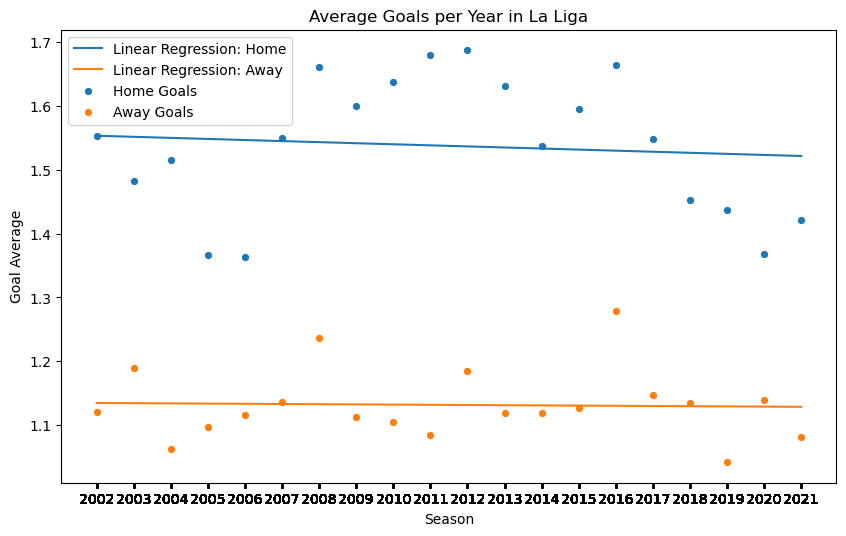

<IPython.core.display.Javascript object>

In [37]:
fig = plt.figure(figsize=(10, 6), dpi = 100)

plt.title("Average Goals per Year in La Liga")
plt.xlabel("Season")
plt.ylabel("Goal Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Home_grouping, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Away_grouping, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Home_grouping, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Away_grouping, Y_Away_Pred))


plt.plot(Time, Y_Home_Pred)
plt.plot(Time, Y_Away_Pred)

sns.scatterplot(
    
    x= Time,
    y=Home_grouping,
)
sns.scatterplot(
    x=Time,
    y=Away_grouping
)
plt.legend(label)
plt.xticks(X_Home)
plt.show()

### Comparing Championships

,season,home_goal,away_goal
0,2003,4.0,2.0
1,2003,2.0,0.0
2,2003,1.0,1.0
3,2003,2.0,2.0
4,2003,1.0,1.0


<IPython.core.display.Javascript object>

In [29]:
ChampDF = [
    goals_italy,
    goals_laliga,
    goals_ligue1,
    goals_premier_league,
    goals_brazillian_seriA
]
ChampName = ["Italy", "Spain", "France", "UK",'Brazil']

#Brazilian Serie A data are between 2003-2020 only


Time = np.arange(2002,2022)
## Creating DataFrames
Home_Scatter = pd.DataFrame(index=Time)
Home_Regression = pd.DataFrame(index=Time)

Away_Scatter = pd.DataFrame(index=Time)
Away_Regression = pd.DataFrame(index=Time)



for i in range(0, 5):
    X = ChampDF[i][ChampDF[i].columns[0]].values
    Home_Scatter[ChampName[i]] = ChampDF[i]["home_goal"]
    Away_Scatter[ChampName[i]] = ChampDF[i]["away_goal"]
    Home_Regression[ChampName[i]] = RegressaoLinear(X, Home_Scatter[ChampName[i]].values,Time)
    Away_Regression[ChampName[i]] = RegressaoLinear(X, Away_Scatter[ChampName[i]].values,Time)



ValueError: Found input variables with inconsistent numbers of samples: [7452, 20]

<IPython.core.display.Javascript object>

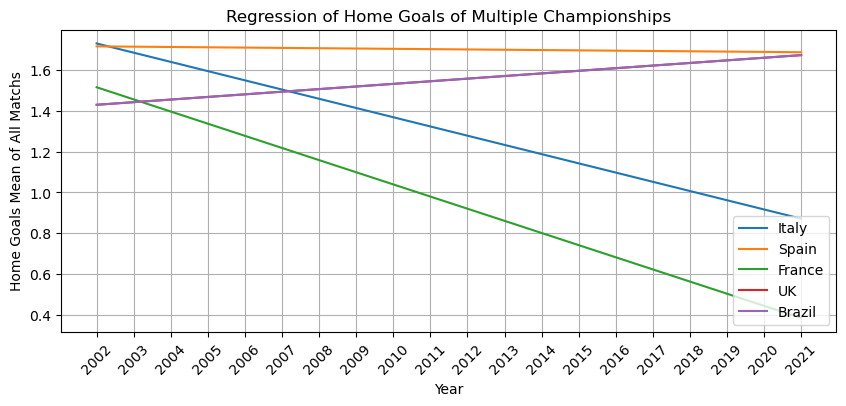

<IPython.core.display.Javascript object>

In [39]:
fig = plt.figure(figsize=(10, 4), dpi=100)

sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="Italy")
sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="Spain")
sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="France")
sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="UK")
sns.lineplot(data=Home_Regression, x=Home_Regression.index, y="Brazil")

plt.title("Regression of Home Goals of Multiple Championships")
plt.grid(True)
plt.legend(ChampName, loc="lower right")
plt.xlabel("Year")
plt.ylabel("Home Goals Mean of All Matchs")
plt.xticks(X, rotation=45)

plt.show()

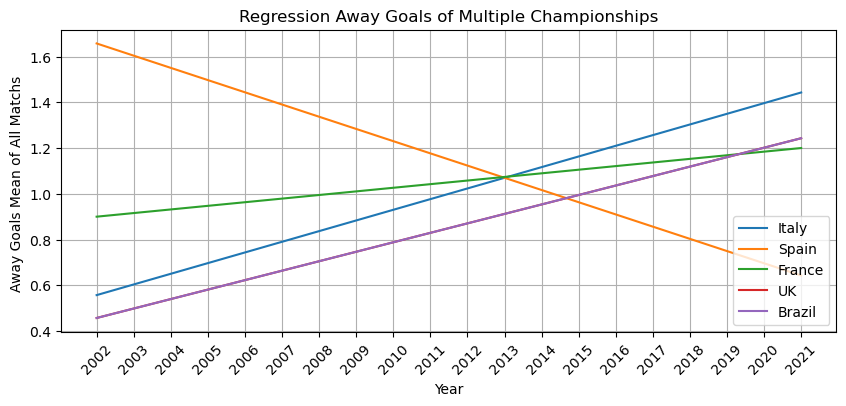

<IPython.core.display.Javascript object>

In [40]:
fig = plt.figure(figsize=(10, 4), dpi=100)

sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="Italy")
sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="Spain")
sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="France")
sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="UK")
sns.lineplot(data=Away_Regression, x=Away_Regression.index, y="Brazil")


plt.title("Regression Away Goals of Multiple Championships")
plt.grid(True)
plt.legend(ChampName, loc="lower right")
plt.ylabel("Away Goals Mean of All Matchs ")
plt.xlabel("Year")
plt.xticks(X, rotation=45)

plt.show()